In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r'/Users/arshita/Documents/Machine learning/Case Study 2 Fyntra/FyntraCustomerData.csv')
df 

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.corr(numeric_only = True)

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

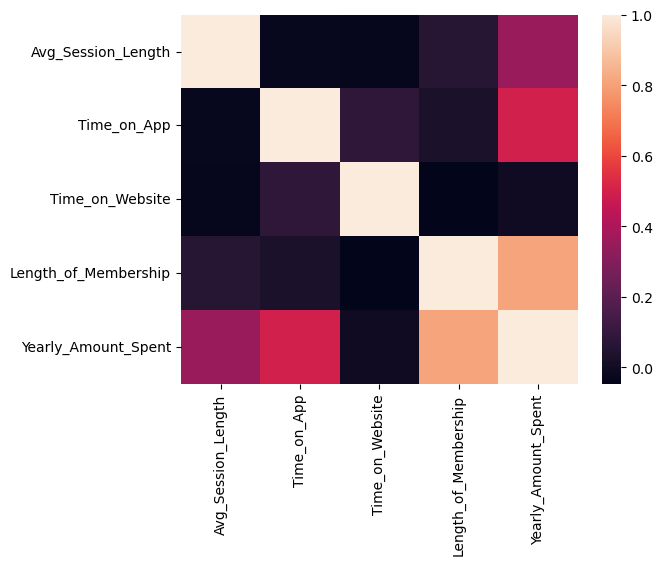

In [5]:
sns.heatmap(df.corr(numeric_only = True))

<Axes: >

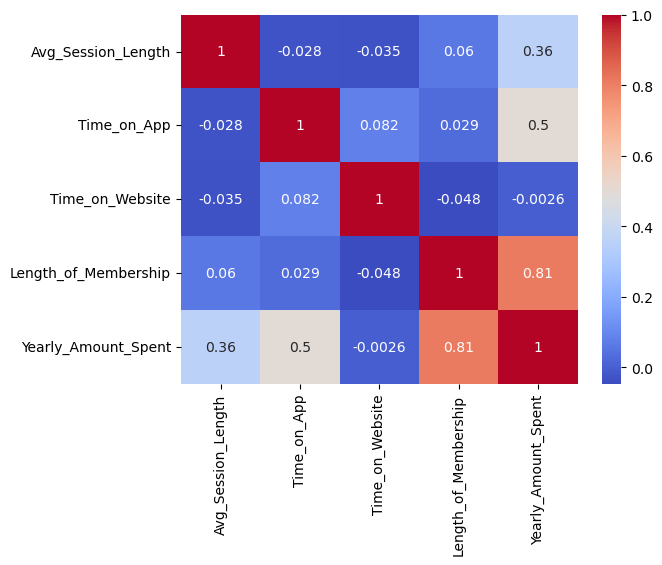

In [6]:
sns.heatmap(df.corr(numeric_only = True), cmap = 'coolwarm', annot = True)

<Axes: xlabel='Time_on_Website', ylabel='Yearly_Amount_Spent'>

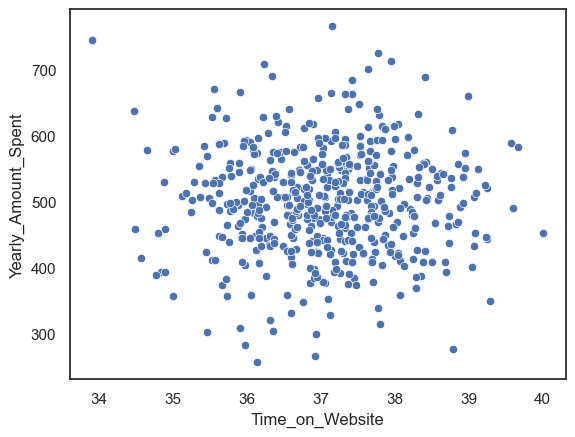

In [7]:
sns.set(style = 'white')
sns.scatterplot(data = df, x = "Time_on_Website", y = "Yearly_Amount_Spent")

### Jointplot 

Is a powerful function used to create a multi-plot grid for visualizing the relationship between two variables. It combines scatterplots (or other bivariate visualizations) with univariate distributions (like histograms or KDE plots) along the axes.

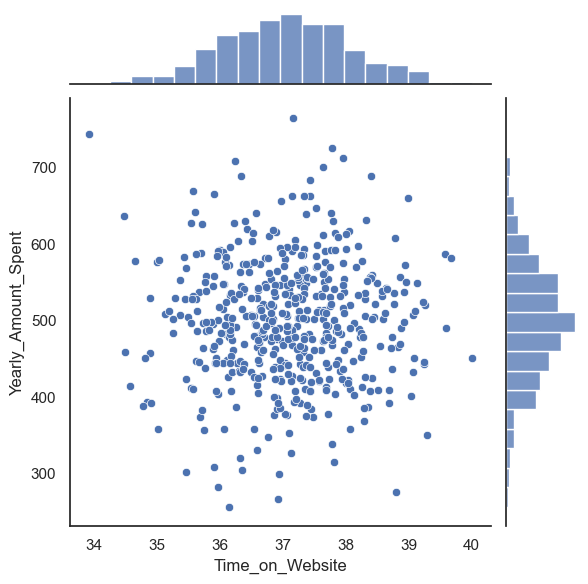

In [8]:
# Create a joint plot
sns.jointplot(data = df, x = "Time_on_Website", y = "Yearly_Amount_Spent")

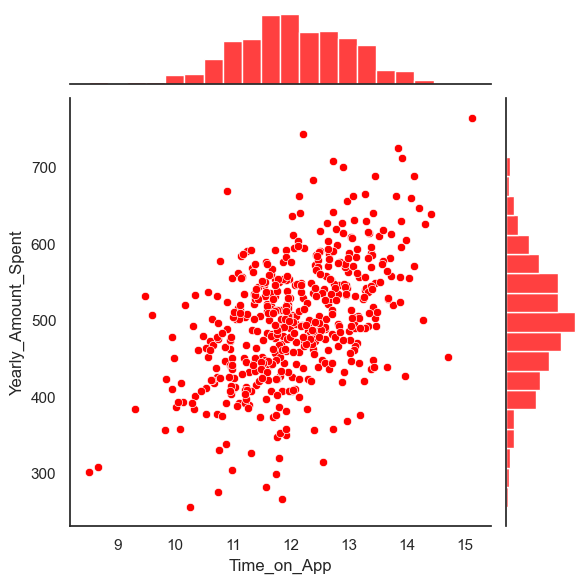

In [9]:
sns.jointplot (data = df, x = 'Time_on_App', y = "Yearly_Amount_Spent", color = 'red')

### Pairplot

Is a versatile function used to visualize relationships between variables in a dataset. It creates a grid of scatterplots for pairwise relationships and histograms (or KDE plots) for individual variable distributions. It's especially useful for exploratory data analysis.

C:\Users\navin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


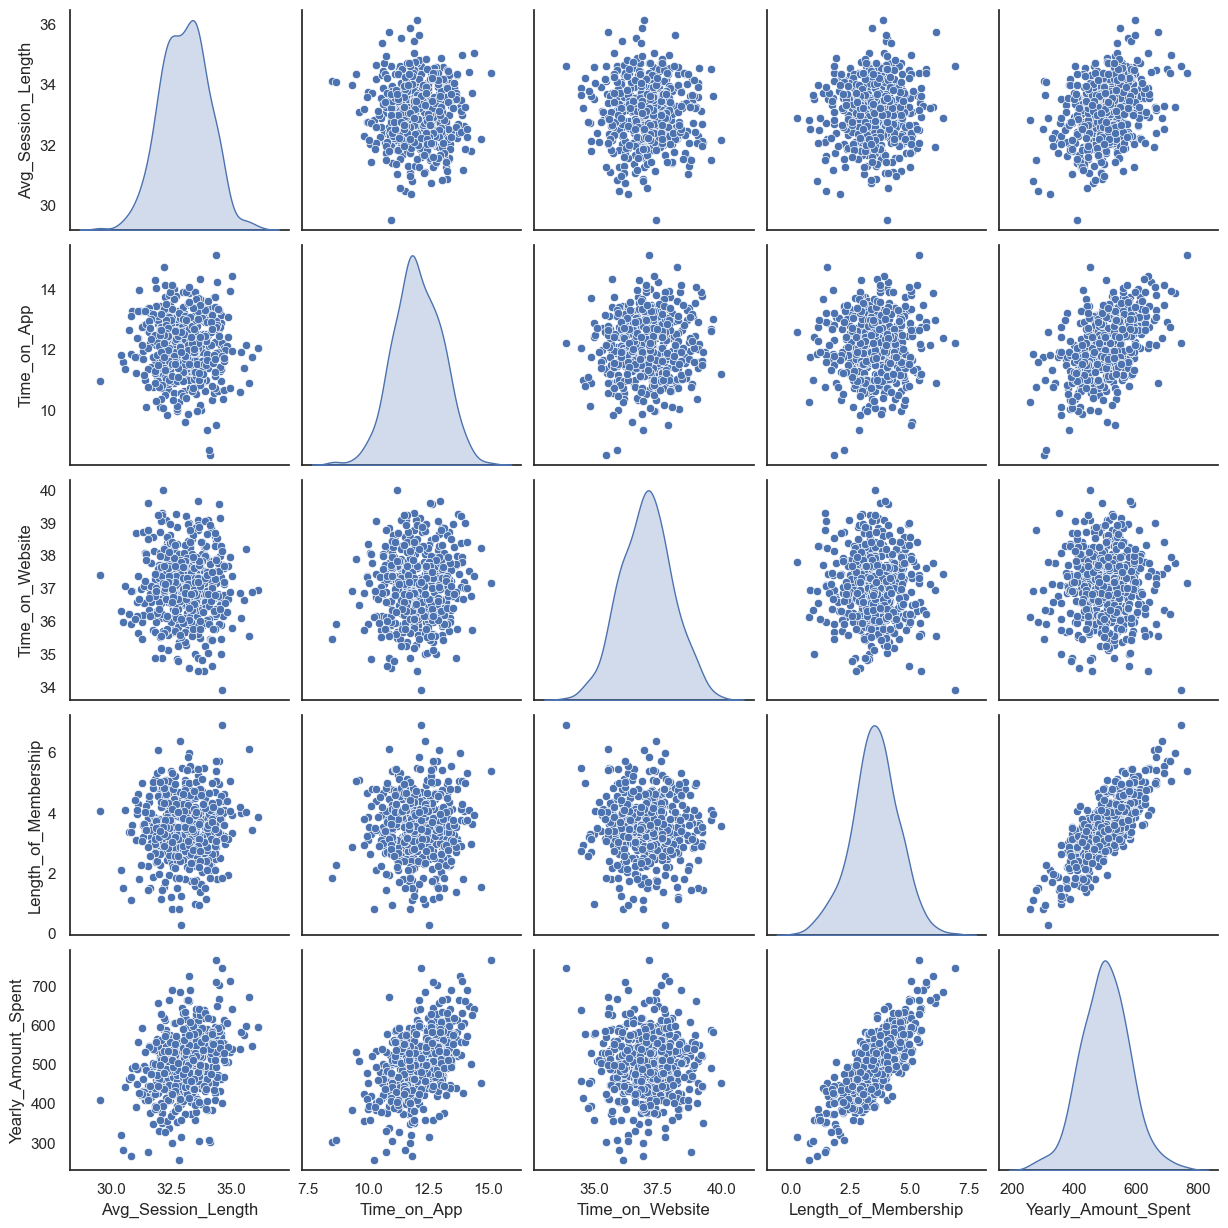

In [10]:
#vars here ensures that numeric features are considered
sns.pairplot(data = df, vars = ['Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent'], diag_kind = 'kde')

### Linear Model

linear model plot is a graphical representation that demonstrates the relationship between two variables, fitting them to a straight line. In your specific case, the linear model plot between Length of Membership and Yearly Amount Spent helps visualize how these two variables are correlated and whether a linear equation can describe their relationship effectively.

C:\Users\navin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


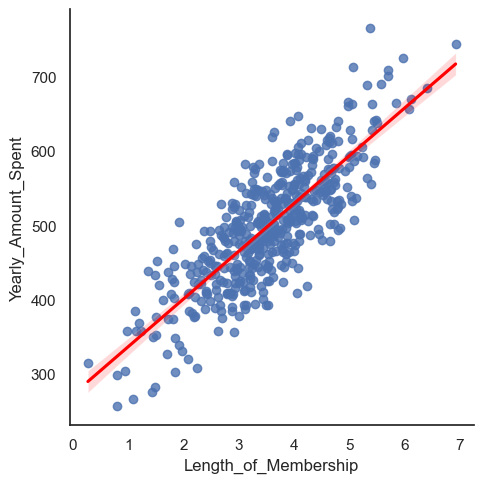

In [11]:
sns.lmplot(x = 'Length_of_Membership', y = 'Yearly_Amount_Spent', data = df, line_kws = {'color': 'red'})

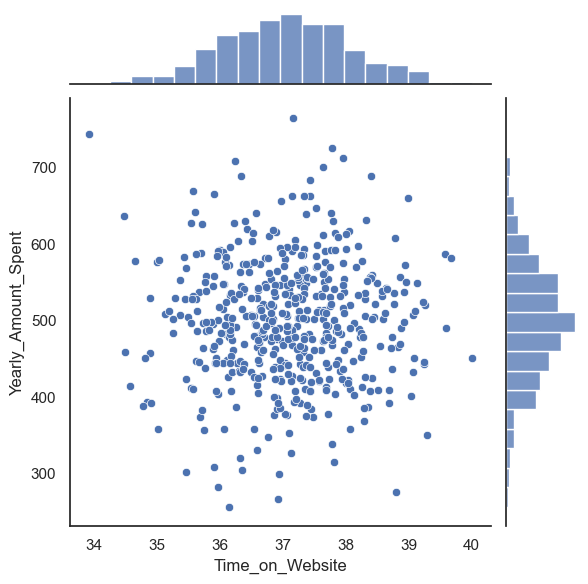

In [12]:
df_time_web_amount = df.filter (
            {'Time_on_Website', "Yearly_Amount_Spent"})
#we are adding an attribute on data set 


sns.set(style = 'white', color_codes = True)
sns.color_palette()
sns.jointplot(x = 'Time_on_Website', y = 'Yearly_Amount_Spent', data = df_time_web_amount)


C:\Users\navin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


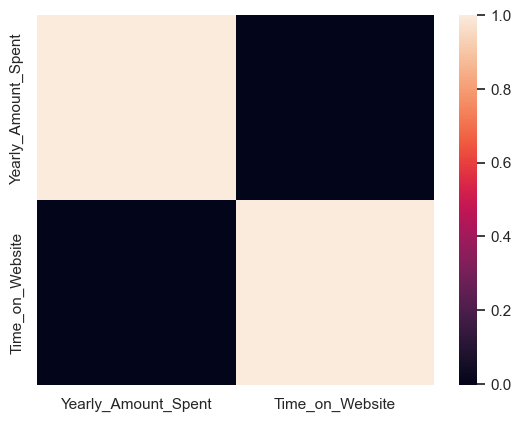

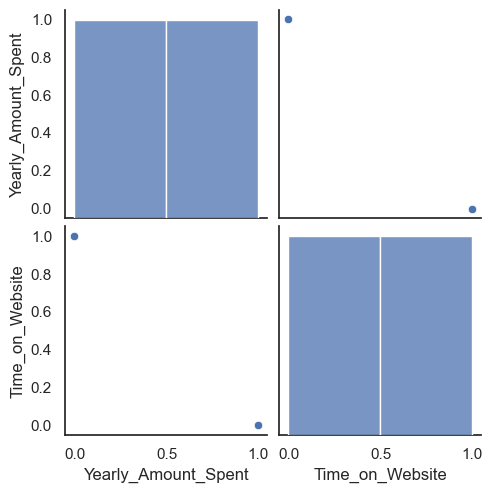

In [15]:
coff_time_web_amount = df_time_web_amount.corr()
sns.heatmap(coff_time_web_amount)
sns.pairplot(coff_time_web_amount)

In [17]:
X = df['Length_of_Membership']
Y = df['Yearly_Amount_Spent']

#X always stores features - independent
#Y always contains target - dependent

In [18]:
X

0      4.082621
1      2.664034
2      4.104543
3      3.120179
4      4.446308
         ...   
495    3.746573
496    3.576526
497    4.958264
498    2.336485
499    2.735160
Name: Length_of_Membership, Length: 500, dtype: float64

In [19]:
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620146
498    456.469510
499    497.778642
Name: Yearly_Amount_Spent, Length: 500, dtype: float64

In [30]:
train_x, test_x, train_y, test_y = train_test_split(
            X, Y, test_size = 0.3, random_state = 1)

#random_state would divide data in blocks (as per the value given) and provide consistent answers
#helps in debugging 

In [31]:
train_x

13     3.918542
61     5.081210
298    5.462501
39     4.222436
360    2.139403
         ...   
255    2.907095
72     3.401522
396    6.115199
235    3.634094
37     3.452389
Name: Length_of_Membership, Length: 350, dtype: float64

In [32]:
test_x

304    3.023474
340    2.964498
47     4.113226
67     3.439591
479    1.820811
         ...   
331    3.689917
197    5.039955
95     3.871003
122    4.018727
23     3.919302
Name: Length_of_Membership, Length: 150, dtype: float64

In [33]:
train_y

13     573.415867
61     507.212569
298    587.574800
39     537.846195
360    444.576144
          ...    
255    524.797628
72     418.150081
396    669.987141
235    501.209173
37     490.738632
Name: Yearly_Amount_Spent, Length: 350, dtype: float64

In [34]:
test_y

#used for calculating accuracy 
#matches predicted values

304    494.687156
340    501.122492
47     563.672873
67     469.310861
479    402.167122
          ...    
331    533.040060
197    662.961088
95     543.340166
122    514.239521
23     519.340989
Name: Yearly_Amount_Spent, Length: 150, dtype: float64

In [36]:
lin_model = LinearRegression()
lin_model.fit(pd.DataFrame(train_x), train_y)

LinearRegression()

In [37]:
predicted_values = lin_model.predict(pd.DataFrame(test_x))

In [38]:
predicted_values

array([467.6136729 , 463.87054505, 536.77808597, 494.0237509 ,
       391.28294587, 494.49514289, 489.18880784, 496.04348778,
       506.42575336, 432.87536311, 535.08604142, 467.08694223,
       516.81733346, 529.70522071, 629.00723823, 486.20919561,
       335.15732354, 390.60188661, 524.15800665, 471.80594928,
       478.93175723, 407.97526965, 463.42315122, 415.90874318,
       617.02502221, 544.71603901, 537.49903058, 521.49535538,
       326.59028712, 550.58164657, 494.22739715, 427.73629671,
       517.1118049 , 418.67799919, 500.21400045, 484.12736173,
       596.22869347, 557.91816311, 494.7955319 , 493.70445349,
       545.06616869, 567.38850942, 385.3265599 , 460.34874007,
       534.56190094, 391.45967678, 479.16836884, 538.28699219,
       427.98456214, 439.90945935, 562.61765856, 348.01569269,
       624.38183335, 510.62944606, 438.94537016, 580.53324521,
       401.19643366, 515.08432651, 429.36349253, 518.6357309 ,
       601.80685405, 600.25206005, 531.46122182, 595.47

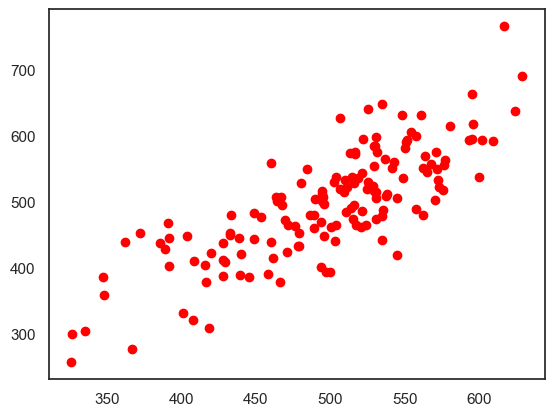

In [48]:
plt.scatter(predicted_values, test_y, color = 'red')
plt.show()